In [5]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
import numpy as np

In [2]:
URL='https://www.amazon.in/s?k=mobiles&ref=nb_sb_noss_1'
user_agent=['Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/113.0.0.0 Saf=ari/537.36 Edg/113.0.1774.42','Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/113.0.0.0 Safari/537.36','Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/113.0.0.0 Safari/537.36']


In [3]:
# Headers for request
import random

HEADERS = ({'User-Agent' :random.choice(user_agent), 'Accept-Language': 'en-US, en;q=0.5'}) #add your user agent 


In [4]:
# HTTP Request
webpage = requests.get(URL, headers=HEADERS)

In [5]:
webpage

<Response [200]>

In [6]:
# Soup Object containiang all data
soup = BeautifulSoup(webpage.content, "html.parser")
soup

<!DOCTYPE html>
<html class="a-no-js" data-19ax5a9jf="dingo" lang="en-in"><!-- sp:feature:head-start -->
<head><script>var aPageStart = (new Date()).getTime();</script><meta charset="utf-8"/>
<!-- sp:end-feature:head-start -->
<!-- sp:feature:csm:head-open-part1 -->
<script type="text/javascript">var ue_t0=ue_t0||+new Date();</script>
<!-- sp:end-feature:csm:head-open-part1 -->
<!-- sp:feature:cs-optimization -->
<meta content="on" http-equiv="x-dns-prefetch-control"/>
<link href="https://images-eu.ssl-images-amazon.com" rel="dns-prefetch"/>
<link href="https://m.media-amazon.com" rel="dns-prefetch"/>
<link href="https://completion.amazon.com" rel="dns-prefetch"/>
<!-- sp:end-feature:cs-optimization -->
<!-- sp:feature:csm:head-open-part2 -->
<script type="text/javascript">
window.ue_ihb = (window.ue_ihb || window.ueinit || 0) + 1;
if (window.ue_ihb === 1) {

var ue_csm = window,
    ue_hob = +new Date();
(function(d){var e=d.ue=d.ue||{},f=Date.now||function(){return+new Date};e.d=func

In [7]:
# Function to extract Product Title
def get_title(soup):

    try:
        # Outer Tag Object
        title = soup.find("span", attrs={"id":'productTitle'})
        
        # Inner NavigatableString Object
        title_value = title.text

        # Title as a string value
        title_string = title_value.strip()

    except AttributeError:
        title_string = ""

    return title_string

# Function to extract features
def get_features(soup):

    try:
        # Outer Tag Object
        title = soup.find("span", attrs={"id":'productTitle'})
        
        # Inner NavigatableString Object
        title_value = title.text

        # Title as a string value
        title_string = title_value.strip()

    except AttributeError:
        title_string = ""

    return title_string
# Function to extract Product Price
def get_price(soup):

    try:
        price = soup.find("span", attrs={'class':'a-price-whole'}).text

    except AttributeError:

        try:
            # If there is some deal price
            price = soup.find("span", attrs={'id':'priceblock_dealprice'}).string.strip()

        except:
            price = ""

    return price

# Function to extract Product Rating
def get_rating(soup):

    try:
        rating = soup.find("span", attrs={'data-hook':'rating-out-of-text','class':'a-size-medium a-color-base'}).text
    
    except AttributeError:
        try:
            rating = soup.find("span", attrs={'class':'a-icon-alt'}).string.strip()
        except:
            rating = ""	

    return rating

# Function to extract Number of User Reviews
def get_review_count(soup):
    try:
        review_count = soup.find("span", attrs={'id':'acrCustomerReviewText'}).string.strip()

    except AttributeError:
        review_count = ""	

    return review_count

# Function to extract Availability Status
def get_availability(soup):
    try:
        available = soup.find("div", attrs={'id':'availability'})
        available = available.find("span").string.strip()

    except AttributeError:
        available = "Not Available"	

    return available
def get_brand_name(soup):

    try:
        brand = soup.find("span", attrs={'class':'a-size-base po-break-word'}).text

    except AttributeError:
        brand = ""
        
    return brand
def get_extract_details(soup):
    
    
    rows = soup.find_all('tr')
    details = {"screen_size": [], "battery_power": [], "ram": [], "storage": [],
     "operating_system": [], "item_weight": []}
    
    for row in rows:
        span_element = row.find('span', class_='a-size-base')
        
        if span_element and span_element.text == 'Screen Size':
            td_element = row.find('td')
            if td_element:
                details['screen_size'] = td_element.text.strip()
            else:
                details['screen_size'] =''
        
        if span_element and span_element.text == 'Battery Power (In mAH)':
            td_element = row.find('td')
            if td_element:
                details['battery_power'] = td_element.text.strip()
            else:
                details['battery_power'] =''
        
        if span_element and span_element.text == 'RAM':
            td_element = row.find('td')
            if td_element:
                details['ram'] = td_element.text.strip()
            else:
                details['ram'] =''
        
        if span_element and span_element.text == 'Inbuilt Storage (in GB)':
            td_element = row.find('td')
            if td_element:
                details['storage'] = td_element.text.strip()
            else:
                details['storage'] =''
        
        if span_element and span_element.text == 'Operating System':
            td_element = row.find('td')
            if td_element:
                details['operating_system'] = td_element.text.strip()
            else:
                details['operating_system'] =''
        
        if span_element and span_element.text == 'Item Weight':
            td_element = row.find('td')
            if td_element:
                details['item_weight'] = td_element.text.strip()
            else:
                details['item_weight'] =''
            
    
    return details

    

In [8]:
print(soup.find_all("a", attrs={'class':'a-link-normal s-underline-text s-underline-link-text s-link-style a-text-normal'}.get('href')))


[<a id="nav-top"></a>, <a class="skip-link" id="skiplink" tabindex="0">Skip to main content</a>, <a aria-label="Amazon.in" class="nav-logo-link nav-progressive-attribute" href="/ref=nav_logo" id="nav-logo-sprites">
<span class="nav-sprite nav-logo-base"></span>
<span class="nav-sprite nav-logo-ext nav-progressive-content" id="logo-ext"></span>
<span class="nav-logo-locale">.in</span>
</a>, <a class="nav-a nav-a-2 a-popover-trigger a-declarative nav-progressive-attribute" id="nav-global-location-popover-link" tabindex="0">
<div class="nav-sprite nav-progressive-attribute" id="nav-packard-glow-loc-icon"></div>
<div id="glow-ingress-block">
<span class="nav-line-1 nav-progressive-content" id="glow-ingress-line1">
                   Hello
                </span>
<span class="nav-line-2 nav-progressive-content" id="glow-ingress-line2">
                   Select your address
                </span>
</div>
</a>, <a aria-label="Choose a language for shopping." class="nav-a nav-a-2 icp-link-sty

In [9]:
links = soup.find_all("a", attrs={'class':'a-link-normal s-underline-text s-underline-link-text s-link-style a-text-normal'})

    # Store the links
links_list = []

    # Loop for extracting links from Tag Objects
for link in links:
        links_list.append(link.get('href'))

print(links_list)

['/sspa/click?ie=UTF8&spc=MTo2OTMzNDcyMjcwOTc2ODQ5OjE2ODQxNDUwODE6c3BfYXRmOjIwMTUyMzQ2NjcxNTk4OjowOjo&url=%2FRedmi-Purple-Design-Performance-Triple%2Fdp%2FB0BBH4C5KT%2Fref%3Dsr_1_1_sspa%3Fkeywords%3Dmobiles%26qid%3D1684145081%26sr%3D8-1-spons%26sp_csd%3Dd2lkZ2V0TmFtZT1zcF9hdGY%26psc%3D1', '/sspa/click?ie=UTF8&spc=MTo2OTMzNDcyMjcwOTc2ODQ5OjE2ODQxNDUwODE6c3BfYXRmOjIwMTQyNjkwMTQwNTk4OjowOjo&url=%2FRedmi-Storage-Performance-Mediatek-Display%2Fdp%2FB0BYN48MQW%2Fref%3Dsr_1_2_sspa%3Fkeywords%3Dmobiles%26qid%3D1684145081%26sr%3D8-2-spons%26sp_csd%3Dd2lkZ2V0TmFtZT1zcF9hdGY%26psc%3D1', '/realme-Segment-Fastest-Charging-High-res/dp/B0BZ48VZMR/ref=sr_1_3?keywords=mobiles&qid=1684145081&sr=8-3', '/Samsung-Storage-MediaTek-Octa-core-Processor/dp/B0BMGB3CH9/ref=sr_1_4?keywords=mobiles&qid=1684145081&sr=8-4', '/Samsung-Storage-MediaTek-Octa-core-Processor/dp/B0BMGB2TPR/ref=sr_1_5?keywords=mobiles&qid=1684145081&sr=8-5', '/Samsung-Storage-Battery-Octa-Core-Processor/dp/B0BZCSSNV7/ref=sr_1_6?keywords=mo

In [10]:
links = soup.find_all("a", attrs={'class':'a-link-normal s-no-outline'})

    # Store the links
links_list = []

    # Loop for extracting links from Tag Objects
for link in links:
        links_list.append(link.get('href'))

In [11]:
links = soup.find_all("a", attrs={'class':'a-link-normal s-no-outline'})

    # Store the links
links_list = []

    # Loop for extracting links from Tag Objects
for link in links:
        links_list.append(link.get('href'))

In [12]:
links = soup.find_all("a", attrs={'class':'a-link-normal s-no-outline'})

    # Store the links
links_list = []

    # Loop for extracting links from Tag Objects
for link in links:
        links_list.append(link.get('href'))

In [13]:
new_webpage = requests.get("https://www.amazon.in/realme-Segment-Fastest-Charging-High-res/dp/B0BZ48VZMR/ref=sr_1_3?keywords=mobiles&sr=8-3&th=1", headers=HEADERS)

new_soup = BeautifulSoup(new_webpage.content, "html.parser")


In [14]:

print(new_soup.find("span", attrs={'class':'a-price-whole'}).text)
print(new_soup.find("span", attrs={"id":'productTitle'}).text)
# print( new_soup.find('span', attrs={'id':'inline-twister-expanded-dimension-text-size_name','class':'a-size-base a-color-base inline-twister-dim-title-value a-text-bold'}).text)
print(new_soup.find("span", attrs={'data-hook':'rating-out-of-text','class':'a-size-medium a-color-base'}).text)
print(new_soup.find("span", attrs={'class':'a-size-base po-break-word'}).text)

# print(new_soup.select('span.a-size-base:contains("RAM")').find("td", attrs={'class':'base-item-column'}).text)
# print(new_soup.select_one("span[a-size-base*=RAM]"))

rows = new_soup.find_all('tr')
for row in rows:
    span_element = row.find('span', class_='a-size-base')
    if span_element and span_element.text == 'Screen Size':
        td_element = row.find('td')
        if td_element:
            print(td_element.text.strip())
    if span_element and span_element.text == 'Battery Power (In mAH)':
        td_element = row.find('td')
        if td_element:
            print(td_element.text.strip())
    if span_element and span_element.text == 'RAM':
        td_element = row.find('td')
        if td_element:
            print(td_element.text.strip()) 
    if span_element and span_element.text == 'Inbuilt Storage (in GB)':
        td_element = row.find('td')
        if td_element:
            print(td_element.text.strip()) 
    if span_element and span_element.text == 'Operating System':
        td_element = row.find('td')
        if td_element:
            print(td_element.text.strip())        
    if span_element and span_element.text == 'Item Weight':
        td_element = row.find('td')
        if td_element:
            print(td_element.text.strip())
        break



10,999.
        realme narzo N55 (Prime Black, 4GB+64GB) 33W Segment Fastest Charging | Super High-res 64MP Primary AI Camera       
4.2 out of 5
realme
6.72 inches
5000
4 GB
64 GB
Android 13.0
190 grams


In [ ]:
# soup.select_one('.s-pagination-item.s-pagination-next')['href']
# webpage = requests.get(URL, headers=HEADERS)
# soup = BeautifulSoup(webpage.content, "html.parser")

In [15]:
d = {"title": [], "price": [], "rating": [],"brand":[],
        "screen_size": [], "battery_power": [], "ram": [], "storage": [],
        "operating_system": [], "item_weight": []}
import time
for i in range(20):
        
    links = soup.find_all("a", attrs={'class':'a-link-normal s-no-outline'})

        # Store the links
    links_list = []

        # Loop for extracting links from Tag Objects
    for link in links:
            links_list.append(link.get('href'))
    

    # Loop for extracting product details from each link 
    for link in links_list:
        delay = random.uniform(1, 3)
        time.sleep(delay)
        new_webpage = requests.get("https://www.amazon.in" + link, headers=HEADERS)

        new_soup = BeautifulSoup(new_webpage.content, "html.parser")

        # Function calls to display all necessary product information
        d['title'].append(get_title(new_soup))
        d['price'].append(get_price(new_soup))
        d['rating'].append(get_rating(new_soup))
        d['brand'].append(get_brand_name(new_soup))
        details = get_extract_details(new_soup)

        # Append the values from the 'details' dictionary to the main dictionary 'd'
        print(len(details))
        for key, value in details.items():
            
            d[key].append(value)
            if value=='':

                print('null' ,key,'value',value)

    URL=soup.select_one('.s-pagination-item.s-pagination-next')['href']
    webpage = requests.get("https://www.amazon.in" + URL, headers=HEADERS)
    soup = BeautifulSoup(webpage.content, "html.parser")


6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6


KeyError: 'href'

In [16]:

for key, value in d.items():
        print(len(d[key]),key)

len(d)

434 title
434 price
434 rating
434 brand
434 screen_size
434 battery_power
434 ram
434 storage
434 operating_system
434 item_weight


10

In [17]:

phone_data=pd.DataFrame(d)

In [1]:
phone_data.to_csv('amazon_phones.csv')

NameError: name 'phone_data' is not defined

In [2]:
import pandas as pd
import numpy as np
data =pd.read_csv('amazon_phones.csv')

In [3]:
data.info()
data_transformed=data.copy()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 434 entries, 0 to 433
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        434 non-null    int64 
 1   title             434 non-null    object
 2   price             433 non-null    object
 3   rating            434 non-null    object
 4   brand             434 non-null    object
 5   screen_size       434 non-null    object
 6   battery_power     434 non-null    object
 7   ram               434 non-null    object
 8   storage           434 non-null    object
 9   operating_system  434 non-null    object
 10  item_weight       434 non-null    object
dtypes: int64(1), object(10)
memory usage: 37.4+ KB


In [4]:
data_transformed['price']=data['price'].str.replace(',','').str.replace('.', '').fillna('-20').astype(int).replace({-20:np.nan})

C:\Users\Harshith\AppData\Local\Temp\ipykernel_12832\3006279927.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data_transformed['price']=data['price'].str.replace(',','').str.replace('.', '').fillna('-20').astype(int).replace({-20:np.nan})


In [5]:
def transform_rating(df):
    try :

        df=df.split()[0]
        return df

    except AttributeError:
        return df


In [6]:
data_transformed['rating']
data_transformed['rating']=data_transformed['rating'].apply(lambda x: transform_rating(x))
data_transformed['rating'][data_transformed['rating'].apply(lambda x: len(x) > 3)]=np.nan


C:\Users\Harshith\AppData\Local\Temp\ipykernel_12832\3983437984.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_transformed['rating'][data_transformed['rating'].apply(lambda x: len(x) > 3)]=np.nan


In [7]:
data_transformed['rating']=data_transformed['rating'].astype(float)
data_transformed['rating'].isnull().sum()


10

In [8]:
def convert_units(value):
    
    parts = value.split()
    converted_value=0
        
    if len(parts) == 2:
        numeric_part = float(parts[0])
        unit = parts[1]
            
        if unit == 'cm':
            converted_value = numeric_part * 0.393701  # Convert cm to inches
        else:
            converted_value = numeric_part  # Keep the original value
        
        
    
    return converted_value

In [9]:
strings =data_transformed['screen_size'].apply(lambda x: transform_rating(x))
index=strings[strings.apply(lambda x: len(x) > 4)].index


In [10]:
data_transformed['screen_size'].apply(lambda x: convert_units(x)).loc[index]

5      6.582681
59     6.555122
65     6.582681
66     6.559059
79     6.559059
86     6.517000
98     6.559059
121    6.559059
134    6.555122
234    6.582681
236    6.559059
244    6.578744
246    6.421263
258    6.559059
262    6.559059
264    6.559059
275    6.421263
297    6.559059
335    6.720476
347    6.555122
379    6.517000
386    6.745000
387    6.559059
388    6.517000
410    6.559059
417    6.519689
Name: screen_size, dtype: float64

In [11]:
data_transformed['screen_size']=data_transformed['screen_size'].apply(lambda x: convert_units(x))

In [12]:
data_transformed['battery_power'][pd.to_numeric(data_transformed['battery_power'], errors='coerce').isna()]

9                       []
23                      []
24                      []
44     1450 Milliamp Hours
153                     []
              ...         
418    5000 Milliamp Hours
419                     []
422    3200 Milliamp Hours
423    5000 Milliamp Hours
426                     []
Name: battery_power, Length: 62, dtype: object

In [13]:
data_transformed['battery_power'][pd.to_numeric(data_transformed['battery_power'], errors='coerce').isna()]=='[]'

9       True
23      True
24      True
44     False
153     True
       ...  
418    False
419     True
422    False
423    False
426     True
Name: battery_power, Length: 62, dtype: bool

In [14]:
import re
def convert_abnormal_value(value):
    
    match = re.search(r'\d+(\.\d+)?', value)
    if match:
        return float(match.group())
    if re.match(r'^\d+(\.\d+)?$', value):
        return float(value)
    else:
        return float('nan')


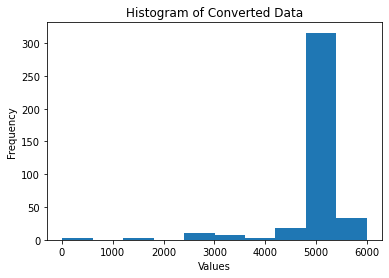

In [15]:
import matplotlib.pyplot as plt
data_transformed['battery_power'].apply(convert_abnormal_value)
plt.hist(data_transformed['battery_power'].apply(convert_abnormal_value))  # Drop NaN values and specify number of bins
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Histogram of Converted Data')
plt.show()

In [16]:
index=data_transformed['battery_power'][pd.to_numeric(data_transformed['battery_power'], errors='coerce').isna()].index

print(data_transformed['battery_power'].apply(convert_abnormal_value).loc[index])

data_transformed['battery_power'].apply(convert_abnormal_value).loc[index].isna().sum()

9         NaN
23        NaN
24        NaN
44     1450.0
153       NaN
        ...  
418    5000.0
419       NaN
422    3200.0
423    5000.0
426       NaN
Name: battery_power, Length: 62, dtype: float64


39

In [17]:
data_transformed['battery_power']=data_transformed['battery_power'].apply(convert_abnormal_value)


In [18]:
def transform_ram(df):
    try :

        df=int(df.split()[0])
        return df

    except ValueError:
        return np.nan

In [19]:
data_transformed['ram'].apply(lambda x: transform_ram(x)).value_counts()

4.0      93
6.0      88
8.0      69
128.0    35
3.0      30
2.0      25
64.0     23
256.0    20
12.0      6
16.0      3
32.0      2
Name: ram, dtype: int64

In [20]:
data_transformed[data_transformed['ram'].apply(lambda x: transform_ram(x))==32]



,Unnamed: 0,title,price,rating,brand,screen_size,battery_power,ram,storage,operating_system,item_weight
170,170,"realme narzo 50i (Mint Green, 2GB RAM+32GB Sto...",6499.0,4.0,Realme,6.500000,5000.0,32 GB,2 GB,Android 11.0,182 grams
176,176,"Micromax X512 Anniversary Edition 1750 mAh, To...",999.0,3.5,Micromax,1.767717,1750.0,32 MB,32 MB,SPREADTRUM,250 grams


In [21]:
from scipy import stats



transformed_data, lambda_value = stats.boxcox( data_transformed['ram'].apply(lambda x: transform_ram(x)))

q25 , q75 = np.percentile(transformed_data, [25, 75])
q25=data_transformed['ram'].apply(lambda x: transform_ram(x)).quantile(0.25)
q75=data_transformed['ram'].apply(lambda x: transform_ram(x)).quantile(0.75)

iqr = q75 - q25
lower_bound = q25 - 1.5 * iqr
upper_bound = q75 + 1.5 * iqr

outliers = (transformed_data < lower_bound) | (transformed_data > upper_bound)

print(sum(outliers==False),lambda_value,upper_bound)

40 8.472135811722177 14.0


In [22]:
data_transformed['ram']=data_transformed['ram'].apply(lambda x: transform_ram(x))

Here  some ram values are abnormal  with storage space having less than them , lets eliminate those values

In [23]:
data_transformed[data_transformed['ram']==32]

,Unnamed: 0,title,price,rating,brand,screen_size,battery_power,ram,storage,operating_system,item_weight
170,170,"realme narzo 50i (Mint Green, 2GB RAM+32GB Sto...",6499.0,4.0,Realme,6.500000,5000.0,32.0,2 GB,Android 11.0,182 grams
176,176,"Micromax X512 Anniversary Edition 1750 mAh, To...",999.0,3.5,Micromax,1.767717,1750.0,32.0,32 MB,SPREADTRUM,250 grams


In [24]:
data_transformed['ram'][data_transformed['ram']>16] = np.nan

C:\Users\Harshith\AppData\Local\Temp\ipykernel_12832\1743083818.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_transformed['ram'][data_transformed['ram']>16] = np.nan


In [25]:
data_transformed['ram'].value_counts()

4.0     93
6.0     88
8.0     69
3.0     30
2.0     25
12.0     6
16.0     3
Name: ram, dtype: int64

In [26]:
data_transformed['storage'].value_counts()

128 GB    138
64 GB      77
4 GB       76
[]         39
256 GB     26
32 GB      21
8 GB       20
6 GB       14
16 GB       5
512 GB      4
2 GB        4
12 GB       2
64          2
128         1
32 MB       1
48 MB       1
1 GB        1
256         1
0 GB        1
Name: storage, dtype: int64

In [27]:
def transform_storage(df):
    try :
        if len(df.split())>1 and df.split()[1] != 'MB':
            df=int(df.split()[0])
            return df

        
        return np.nan

    except ValueError:
        return np.nan

In [28]:
data_transformed['storage'].str.split()[1][0]

'4'

In [29]:
data_transformed['storage']=data_transformed['storage'].apply(lambda x: transform_storage(x))

In [30]:

# data_transformed[data_transformed['storage'].apply(lambda x: transform_storage(x))==512]
data_transformed['storage'][data_transformed['storage']<12]=np.nan

C:\Users\Harshith\AppData\Local\Temp\ipykernel_12832\1330777185.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_transformed['storage'][data_transformed['storage']<12]=np.nan


In [31]:
def transform_weight(df):
    try :
        
        df=int(df.split()[0])
        return df


    except ValueError:
        return np.nan

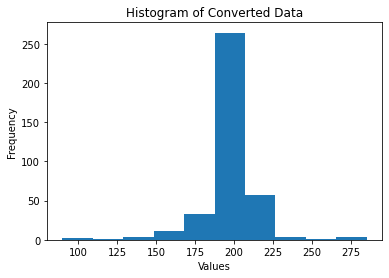

In [32]:
data_transformed['item_weight'].apply(lambda x: transform_weight(x))
plt.hist(data_transformed['item_weight'].apply(lambda x: transform_weight(x)))  # Drop NaN values and specify number of bins
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Histogram of Converted Data')
plt.show()

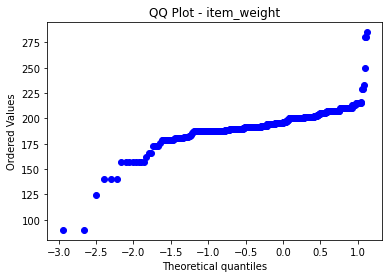

In [33]:
import scipy.stats as stats
import matplotlib.pyplot as plt

# Perform QQ plot
qqplot = stats.probplot(data_transformed['item_weight'].apply(lambda x: transform_weight(x)), dist="norm", plot=plt)

# Display the QQ plot
plt.title("QQ Plot - item_weight")
plt.show()

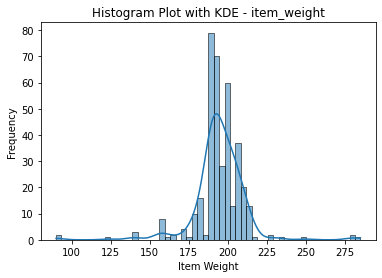

In [34]:
import seaborn as sns

# Create histogram plot with KDE
sns.histplot(data_transformed['item_weight'].apply(lambda x: transform_weight(x)), kde=True)

# Set plot title and labels
plt.title("Histogram Plot with KDE - item_weight")
plt.xlabel("Item Weight")
plt.ylabel("Frequency")

# Display the plot
plt.show()

In [35]:
data_transformed['item_weight']=data_transformed['item_weight'].apply(lambda x: transform_weight(x))

In [36]:
data_transformed.columns 

Index(['Unnamed: 0', 'title', 'price', 'rating', 'brand', 'screen_size',
       'battery_power', 'ram', 'storage', 'operating_system', 'item_weight'],
      dtype='object')

In [37]:
# Remove the column 'Unnamed: 0'
data_transformed = data_transformed.drop('Unnamed: 0', axis=1)

# Rename the columns
data_transformed = data_transformed.rename(columns={
    'screen_size': 'screen_size(inches)',
    'ram': 'ram(GB)',
    'storage': 'storage(GB)',
    'item_weight': 'item_weight(grams)'
})








In [38]:
data_transformed = data_transformed.rename(columns={
    'battery_power': 'battery_power(MAH)'})

In [39]:
data_transformed.describe()

,price,rating,screen_size(inches),battery_power(MAH),ram(GB),storage(GB),item_weight(grams)
count,433.000000,424.000000,434.000000,395.000000,314.000000,273.000000,378.000000
mean,16928.942263,3.873585,5.832364,4924.516456,5.452229,117.479853,194.597884
std,12706.409441,0.451224,2.040368,722.568161,2.357629,76.315766,16.935114
min,649.000000,1.000000,0.000000,10.000000,2.000000,12.000000,90.000000
25%,8999.000000,3.800000,6.500000,5000.000000,4.000000,64.000000,188.250000
50%,12999.000000,3.900000,6.580000,5000.000000,6.000000,128.000000,194.000000
75%,19999.000000,4.100000,6.670000,5000.000000,6.000000,128.000000,201.000000
max,134999.000000,5.000000,6.800000,6000.000000,16.000000,512.000000,285.000000


In [48]:
data_transformed['brand']=data_transformed['brand'].str.upper()
data_transformed[data_transformed['brand']=='POCO BY XIAOMI']='POCO'

In [49]:
data_transformed['brand'].unique()

array(['REDMI', 'REALME', 'SAMSUNG', 'ONEPLUS', 'NOKIA', 'TECNO', 'LAVA',
       'IQOO', 'PORTRONICS', 'AMKETTE', 'OPPO', 'ITEL', 'VIVO', 'XIAOMI',
       'IKALL', 'MICROMAX', 'XIFO', 'POCO', 'MOTOROLA', 'MI', 'GENERIC',
       'FRND', 'INFINIX', 'SHIVANSH'], dtype=object)